#Projeto Final
##Análise de dados de jogos da Steam


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import plotly.express as px

###Checando Dados

In [138]:
df_appdata = pd.read_csv('/content/drive/MyDrive/Projeto_Final/dados/steam_app_data.csv')
df_spy = pd.read_csv('/content/drive/MyDrive/Projeto_Final/dados/steamspy_data.csv')

###Verificando Dados de appdata e steamspy

In [139]:
pd.set_option('display.max_columns', None)
df_appdata.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,fullgame,supported_languages,header_image,website,pc_requirements,mac_requirements,linux_requirements,legal_notice,drm_notice,ext_user_account_notice,developers,publishers,demos,price_overview,packages,package_groups,platforms,metacritic,reviews,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,NaN,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 1450, 'final': ...","[574941, 7]","[{'name': 'default', 'title': 'Buy Counter-Str...","{'windows': True, 'mac': True, 'linux': True}","{'score': 88, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 137378},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[29],"[{'name': 'default', 'title': 'Buy Team Fortre...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 5474},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,"English, French, German, Italian, Spanish - Spain",https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dayofdefeat.com/,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",NaN,NaN,NaN,['Valve'],['Valve'],NaN,"{'currency': 'AUD', 'initial': 750, 'final': 7...",[30],"[{'name': 'default', 'title': 'Buy Day of Defe...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 3694},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum':

In [140]:
df_spy.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,216345,5530,0,"10,000,000 .. 20,000,000",0,0,0,0,999,999,0,"English, French, German, Italian, Spanish - Sp...",Action,10775,"{'Action': 5448, 'FPS': 4862, 'Multiplayer': 3..."
1,20,Team Fortress Classic,Valve,Valve,NaN,6472,990,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,77,"{'Action': 759, 'FPS': 320, 'Multiplayer': 272..."
2,30,Day of Defeat,Valve,Valve,NaN,5686,634,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Spain",Action,89,"{'FPS': 794, 'World War II': 261, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,2242,490,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,8,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,17468,890,0,"2,000,000 .. 5,000,000",0,0,0,0,499,499,0,"English, French, German, Korean",Action,162,"{'FPS': 905, 'Action': 343, 'Classic': 271, 'S..."


In [141]:
colunas_principais = ['name', 'type','required_age', 'is_free', 'recommendations', 'price_overview', 'metacritic']
df_appdata = df_appdata[colunas_principais]

In [142]:
colunas_principais2 =['name', 'developer', 'publisher', 'positive', 'negative', 'genre', 'ccu']
df_spy  = df_spy[colunas_principais2]

In [143]:
df_unidas = pd.merge(df_appdata, df_spy, on = 'name',  how='inner')
df_unidas = df_unidas.reset_index(drop = True)

In [144]:
df_unidas.head()

,name,type,required_age,is_free,recommendations,price_overview,metacritic,developer,publisher,positive,negative,genre,ccu
0,Counter-Strike,game,0.0,False,{'total': 137378},"{'currency': 'AUD', 'initial': 1450, 'final': ...","{'score': 88, 'url': 'https://www.metacritic.c...",Valve,Valve,216345,5530,Action,10775
1,Team Fortress Classic,game,0.0,False,{'total': 5474},"{'currency': 'AUD', 'initial': 750, 'final': 7...",NaN,Valve,Valve,6472,990,Action,77
2,Day of Defeat,game,0.0,False,{'total': 3694},"{'currency': 'AUD', 'initial': 750, 'final': 7...","{'score': 79, 'url': 'https://www.metacritic.c...",Valve,Valve,5686,634,Action,89
3,Deathmatch Classic,game,0.0,False,{'total': 1924},"{'currency': 'AUD', 'initial': 750, 'final': 7...",NaN,Valve,Valve,2242,490,Action,8
4,Half-Life: Opposing Force,game,0.0,False,{'total': 15478},"{'currency': 'AUD', 'initial': 750, 'final': 7...",NaN,Gearbox Software,Valve,17468,890,Action,162


In [145]:
df_unidas.isnull().sum()

,0
name,0
type,6
required_age,6
is_free,6
recommendations,72
price_overview,242
metacritic,358
developer,1
publisher,0
positive,0


In [146]:
df_unidas['recommendations'] = df_unidas['recommendations'].fillna("{'total': 0}")
df_unidas['recommendations'] = df_unidas['recommendations'].apply(lambda x: ast.literal_eval(x)['total'])

In [147]:
sns.set_style('darkgrid')

In [148]:
df_unidas['price_overview'] = df_unidas['price_overview'].fillna("{'final': '0'}")
# Collecting the final key and transforming it to float
df_unidas['price_overview'] = df_unidas['price_overview'].apply(lambda x: float(ast.literal_eval(x)['final'])/100)

In [149]:
df_unidas['metacritic'] = df_unidas['metacritic'].fillna("{'score': '0'}")

In [150]:
df_unidas['metacritic'] = df_unidas['metacritic'].apply(lambda x: float(ast.literal_eval(x)['score']))

In [151]:
df_unidas.rename(columns={'metacritic': 'metacritic_score'}, inplace=True)
df_unidas['metacritic_score'].head()

,metacritic_score
0,88.0
1,0.0
2,79.0
3,0.0
4,0.0


In [152]:
df_unidas = df_unidas.dropna()

In [153]:
df_unidas.head()

,name,type,required_age,is_free,recommendations,price_overview,metacritic_score,developer,publisher,positive,negative,genre,ccu
0,Counter-Strike,game,0.0,False,137378,14.5,88.0,Valve,Valve,216345,5530,Action,10775
1,Team Fortress Classic,game,0.0,False,5474,7.5,0.0,Valve,Valve,6472,990,Action,77
2,Day of Defeat,game,0.0,False,3694,7.5,79.0,Valve,Valve,5686,634,Action,89
3,Deathmatch Classic,game,0.0,False,1924,7.5,0.0,Valve,Valve,2242,490,Action,8
4,Half-Life: Opposing Force,game,0.0,False,15478,7.5,0.0,Gearbox Software,Valve,17468,890,Action,162


###Idade mínima para jogar determinados tipos de jogos.
###Onde a maioria é acima dos 14

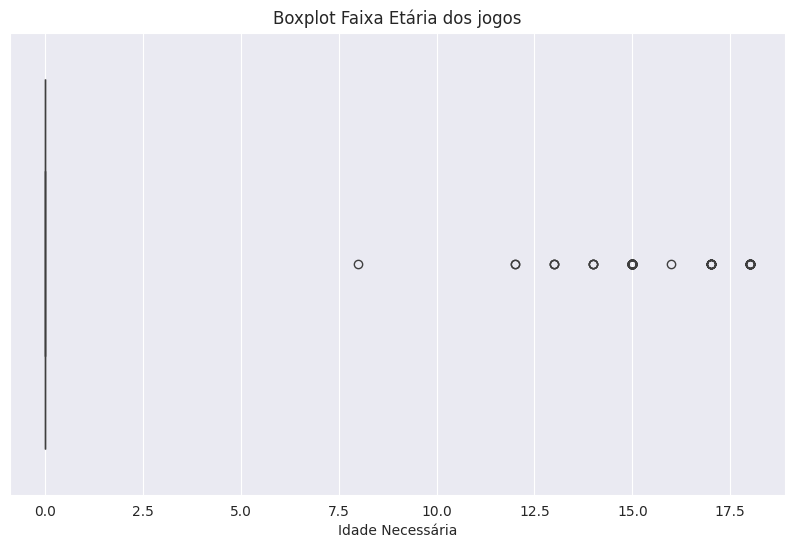

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='required_age', data=df_unidas)
plt.title('Boxplot Faixa Etária dos jogos')
plt.xlabel('Idade Necessária')
plt.show()

###Gráfico para se basear nas recomendações pelo preço
###Onde vemos que a recomendação é maior se o preço for menor

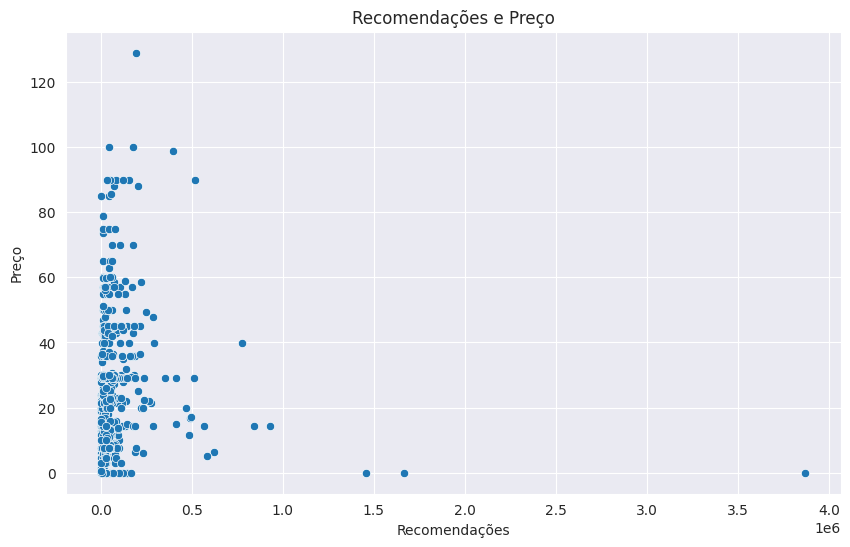

In [156]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recommendations', y='price_overview', data=df_unidas)
plt.title('Recomendações e Preço')
plt.xlabel('Recomendações')
plt.ylabel('Preço')
plt.show()

In [159]:
df_unidas['genre_splitted'] = df_unidas['genre'].apply(lambda x: x.split(', '))
contagem_generos = df_unidas['genre_splitted'].explode().value_counts()


In [160]:
contagem_generos.head()

,count
genre_splitted,
Action,550
Indie,348
Adventure,307
RPG,203
Simulation,178


###A quantidade de jogos por categoria
###Vemos que a maioria dos jogos é da categoria ação

In [170]:
df = pd.DataFrame({'Catagory': contagem_generos.index, 'Number of Games': contagem_generos.values})

fig = px.bar(df, x='Catagory', y='Number of Games', text='Number of Games', title='Quantidade de Jogos por Categorira',
             labels={'Number of Games': 'Quantidade', 'Catagory': 'Categoria'})

fig.update_layout(xaxis=dict(tickangle=45, tickmode='array', tickvals=list(range(len(contagem_generos.index))), ticktext=contagem_generos.index))

fig.show()


###Os 10 jogos mais populares com a quantidade de jogadores

In [172]:
top_10_games = df_unidas.nlargest(10, 'ccu')

fig = px.bar(top_10_games, x='name', y='ccu',
             title='Top 10 Jogos mais Populares ',
             labels={'ccu': 'Popularidade', 'name': 'Jogo'},)

fig.show()

In [173]:
df_unidas.head()

,name,type,required_age,is_free,recommendations,price_overview,metacritic_score,developer,publisher,positive,negative,genre,ccu,genre_splitted
0,Counter-Strike,game,0.0,False,137378,14.5,88.0,Valve,Valve,216345,5530,Action,10775,[Action]
1,Team Fortress Classic,game,0.0,False,5474,7.5,0.0,Valve,Valve,6472,990,Action,77,[Action]
2,Day of Defeat,game,0.0,False,3694,7.5,79.0,Valve,Valve,5686,634,Action,89,[Action]
3,Deathmatch Classic,game,0.0,False,1924,7.5,0.0,Valve,Valve,2242,490,Action,8,[Action]
4,Half-Life: Opposing Force,game,0.0,False,15478,7.5,0.0,Gearbox Software,Valve,17468,890,Action,162,[Action]


###Jogos com as maiores notas pelo site metacritic

In [174]:
top_10_metacritic = df_unidas.nlargest(10, 'metacritic_score')

fig = px.bar(top_10_metacritic, x='name', y='metacritic_score',
             title='Top 10 Jogos pela pontuação Metacritic',
             labels={'metacritic_score': 'Pontuação', 'name': 'Jogos'},
             hover_data=['positive', 'negative', 'genre'])

fig.update_layout(yaxis=dict(range=[90, 100]))
fig.show()


###Um gráfico para visualizar a porcentagem dos jogos Gratuitos e Pagos.
###Vermelho = Gratis Azul = Pago
###A maioria dos jogos são pagos

In [175]:
df_unidas['is_free'] = df_unidas['is_free'].map({True: 'Free', False: 'Paid'})

fig = px.pie(df_unidas, names='is_free', title='Distribuição jogos Pagos x Gratuitos',
             labels={'is_free': 'Tipo de Pagamento'}, hole=0.3, color_discrete_map={'Paid': 'red', 'Free': 'green'})

fig.update_layout(showlegend=False)

fig.show()

###Um histograma para ler como os jogos estão distribuidos com o preço.

In [178]:
fig = px.histogram(df_unidas, x='price_overview', nbins=30,
                   title='Distribuição de Preços',
                   labels={'price_overview': 'Price'},
                   marginal='box')

fig.update_layout(xaxis_title='Preço', yaxis_title='Frequência')

fig.show()